In [34]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, mean_squared_error, accuracy_score
import xgboost as xgb
import time
import random as rnd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [35]:
def to_stand(x):
    return (x-np.mean(x))/np.std(x)
def to_norm(x):
    return (x-np.min(x))/(np.max(x)-np.min(x))

In [36]:
TrainData = pd.read_csv('count_train.csv')
X = TrainData.drop('yC', axis = 1)
Y = TrainData['yC']
Y = (Y - np.mean(Y))/np.std(Y)
X = X.apply(to_norm)

In [37]:
TestData = pd.read_csv('count_test.csv')
Xt = TestData.drop('yC', axis = 1)
Yt = TestData['yC']
Yt = (Yt - np.mean(Y))/np.std(Y)
Xt = Xt.apply(to_norm)

In [38]:
TrueData = pd.read_csv('datacountstudents.csv')
XT = TrueData.drop('yC', axis = 1)
YT = TrueData['yC']
YT = (Yt - np.mean(Y)/np.std(Y))
XT = Xt.apply(to_stand)

In [39]:
data_dmatrix = xgb.DMatrix(data=XT,label=YT)
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1, 'max_depth': 5, 'alpha': 10}

In [40]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

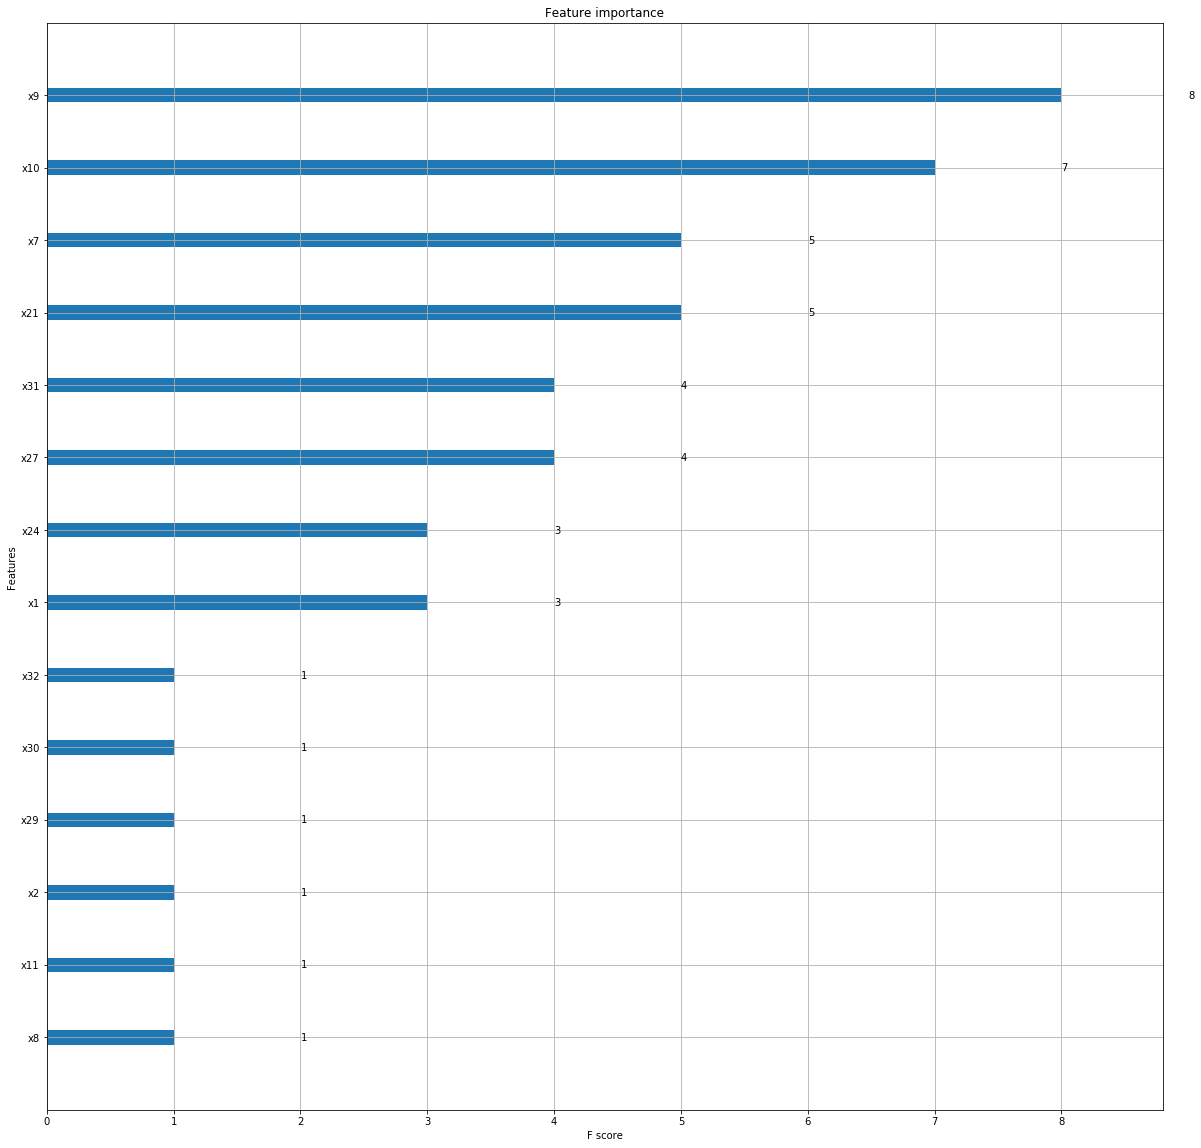

In [41]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()

In [43]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')
xg_reg.fit(X[['x10','x9', 'x21', 'x7']],Y)
preds = xg_reg.predict(Xt[['x10','x9', 'x21', 'x7']])
np.sqrt(mean_squared_error(Yt, preds))

2.214788073366732

In [ ]:
print(min(RMSE_List))
print(min(RMSE_List_round))
print(min(RMSE_List_floor))
print(min(RMSE_List_ceil))

In [ ]:
print(min(RMSE_List))
print(min(RMSE_List_round))
print(min(RMSE_List_floor))
print(min(RMSE_List_ceil))